In [14]:
## import library

import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# 머신러닝 알고리즘
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
customers = pd.read_csv('customers.csv')
customers.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [3]:
print(customers.shape[0])
customers.info()

1371980
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [4]:
# 중복 여부 체크 -> 중복 없음 확인
customers.shape[0] - customers['customer_id'].nunique()

0

In [5]:
# postal_code별로 고객 수를 집계하고, 고객 수가 많은 순으로 정렬하여 상위 5개를 출력
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


## 1. 고객 연령대 분포 파악

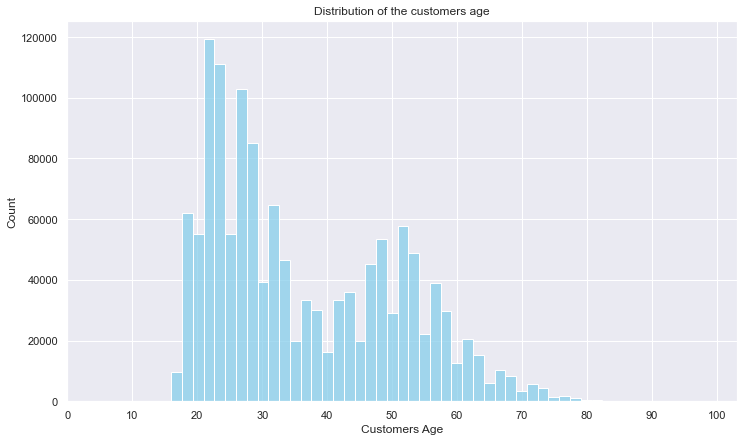

In [17]:
## 고객 연령대 분포 파악

# 고객 정보 데이터셋 불러오기
customers = pd.read_csv('customers.csv') 

# 라이브러리 참조
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 설정
sns.set_style("darkgrid")

# 그래프 그리기
plt.figure(figsize=(12, 7))
sns.histplot(data=customers, x='age', bins=50, color='skyblue')
plt.xlabel('Customers Age')
plt.title('Distribution of the customers age')
plt.xticks(range(0, 101, 10))  # x축 눈금 간격을 10단위로 설정

plt.show()

## 2. 전체 고객 & 2030 세대 고객층 패션 뉴스 알림 주기 비율 파악

In [20]:
customers = pd.read_csv('customers.csv')
unique_fashion_news_frequency = customers['fashion_news_frequency'].unique()
print(unique_fashion_news_frequency)

['NONE' 'Regularly' nan 'Monthly' 'None']


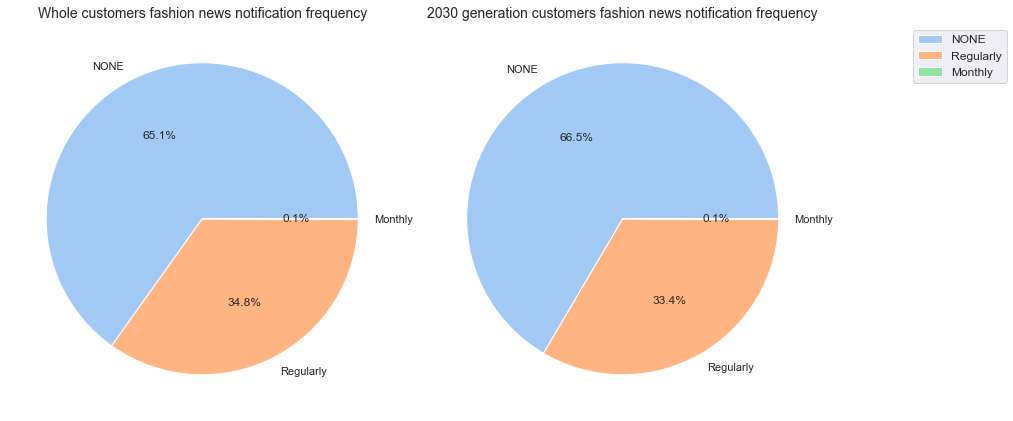

In [21]:
## 전체 고객층 & 2030세대 고객층의 패션 뉴스 알림 주기 비율 파악

# 'None'과 NaN 값을 'NONE'으로 처리
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# 20세부터 39세 사이의 고객 필터링
young_customers = customers[(customers['age'] >= 20) & (customers['age'] <= 39)]

# 전체 고객에 대한 'fashion_news_frequency' 비율 계산
total_freq = customers['fashion_news_frequency'].value_counts(normalize=True) * 100

# 20세부터 39세 사이의 고객에 대한 'fashion_news_frequency' 비율 계산
young_freq = young_customers['fashion_news_frequency'].value_counts(normalize=True) * 100

# 색상 설정
colors = sns.color_palette('pastel')

# 전체 고객 pie chart
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie(total_freq, labels=total_freq.index, colors=colors, autopct='%1.1f%%')
plt.title('Whole customers fashion news notification frequency', fontsize=14)

# 20세부터 39세 사이 고객 pie chart
plt.subplot(1, 2, 2)
plt.pie(young_freq, labels=young_freq.index, colors=colors, autopct='%1.1f%%')
plt.title('2030 generation customers fashion news notification frequency', fontsize=14)

# 범례 위치 조정 및 크기 설정
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), fontsize=12)

plt.tight_layout()
plt.show()

## 3. 전체 고객 & 2030 세대 고객의 회원 상태 비율 파악

In [24]:
customers = pd.read_csv('customers.csv')
unique_club_member_status = customers['club_member_status'].unique()
print(unique_club_member_status)

['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']


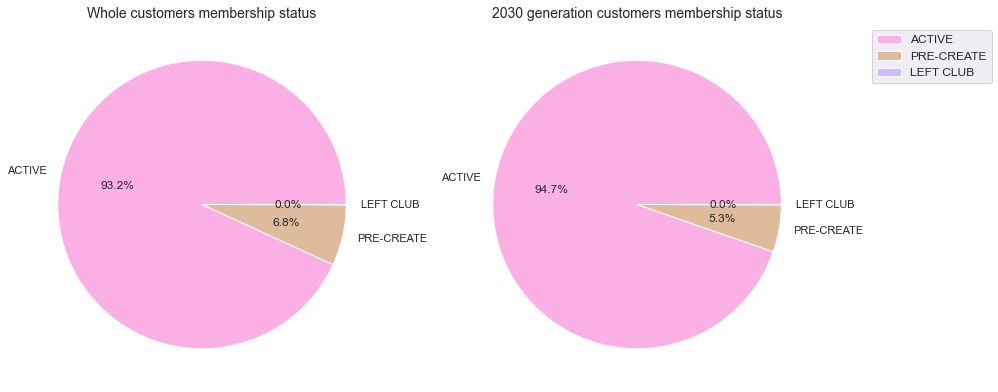

In [27]:
## 전체 고객 & 2030세대 고객의 회원 상태 비율 파악

# 플롯 색상
colors = {
    'ACTIVE': sns.color_palette('pastel')[6],
    'PRE-CREATE': sns.color_palette('pastel')[5],
    'LEFT CLUB': sns.color_palette('pastel')[4]
}

# 전체 고객에 대한 'club_member_status' 비율 계산
total_member_status = customers['club_member_status'].value_counts(normalize=True) * 100

# 20세부터 39세 사이의 고객에 대한 'club_member_status' 비율 계산
young_members = customers[(customers['age'] >= 20) & (customers['age'] <= 39)]
young_member_status = young_members['club_member_status'].value_counts(normalize=True) * 100

# 그래프 그리기
plt.figure(figsize=(14, 7))

# 전체 고객 pie chart
plt.subplot(1, 2, 1)
plt.pie(total_member_status, labels=total_member_status.index, 
        colors=[colors[key] for key in total_member_status.index], autopct='%1.1f%%')
plt.title('Whole customers membership status', fontsize=14)

# 20세부터 39세 사이 고객 pie chart
plt.subplot(1, 2, 2)
plt.pie(young_member_status, labels=young_member_status.index, 
        colors=[colors[key] for key in young_member_status.index], autopct='%1.1f%%')
plt.title('2030 generation customers membership status', fontsize=14)

# 범례 위치 조정 및 크기 설정
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
left_club_count = customers[customers['club_member_status'] == 'LEFT CLUB'].shape[0]
print(left_club_count)

467


# customers.csv, transactions_train.csv 파일 customer_id 기준으로 병합

In [32]:
# fashion_news_frequency 컬럼의 'None'과 NaN 값을 'NONE'으로 처리
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# transactions_train.csv 파일 불러오기
transactions = pd.read_csv('transactions_train.csv')

# 두 데이터프레임 병합
df = pd.merge(customers, transactions, on='customer_id', how='inner')

# 병합된 데이터프레임 확인
df.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,0.044051,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,0.035576,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010,0.030492,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006,0.010153,2
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2
5,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2
6,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-07-25,607642008,0.012695,1
7,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-07-25,745232001,0.021169,1
8,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-09-18,656719005,0.044051,2
9,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-09-28,797065001,0.054220,2


## 1. 고객 연령대별 구매 금액 분포 파악

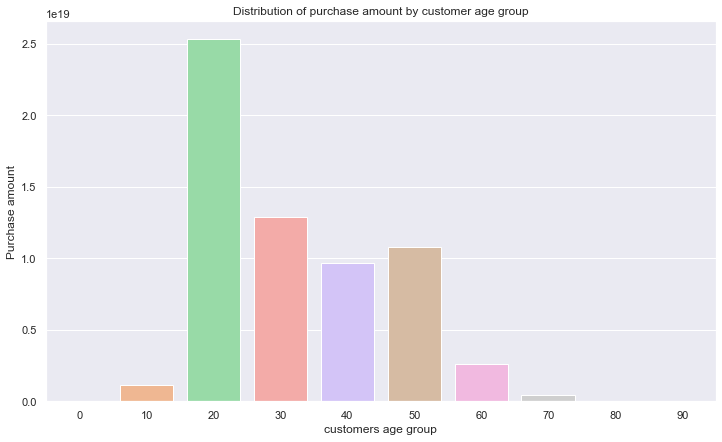

In [39]:
## 고객 연령대별 구매 금액 분포 파악

# fashion_news_frequency 컬럼의 'None'과 NaN 값을 'NONE'으로 처리
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# transactions_train.csv 파일 불러오기
transactions = pd.read_csv('transactions_train.csv')

# 두 데이터프레임 병합
df = pd.merge(customers, transactions, on='customer_id', how='inner')

# 'age' 컬럼을 10세씩 묶어서 그룹화
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0', '10', '20', '30', '40', '50', '60', '70', '80', '90'], right=False)

# 'price' 컬럼에 590을 곱하여 실제 구매 가격으로 변환
df['actual_price'] = df['price'] * 590

# 연령대별 구매 금액 합계 계산
age_group_purchase = df.groupby('age_group')['actual_price'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=age_group_purchase, x='age_group', y='actual_price', palette='pastel')
plt.xlabel('customers age group')
plt.ylabel('Purchase amount')
plt.title('Distribution of purchase amount by customer age group')
plt.show()

## 2. 고객 연령대별 구매 유입 채널(오프라인/온라인) 차이 파악

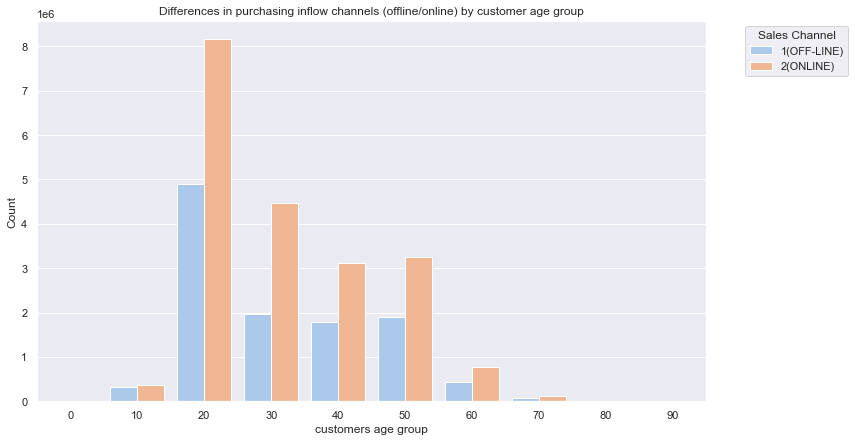

In [42]:
## 고객 연령대별 구매 유입 채널(오프라인/온라인) 차이 파악

# 중복되는 customer_id 제거하여 각 고객의 최근 구매 방식 파악
latest_purchase = df.groupby('customer_id')['sales_channel_id'].last().reset_index()

# 연령대별로 구매 방식에 대한 차이 파악
age_group_purchase_channel = pd.merge(latest_purchase, df[['customer_id', 'age_group']], on='customer_id', how='inner')
age_group_purchase_channel = age_group_purchase_channel.groupby(['age_group', 'sales_channel_id']).size().reset_index(name='count')

# 범례 라벨 이름 변경
legend_labels = {
    1: '1(OFF-LINE)',
    2: '2(ONLINE)'
}
age_group_purchase_channel['sales_channel_id'] = age_group_purchase_channel['sales_channel_id'].map(legend_labels)

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=age_group_purchase_channel, x='age_group', y='count', hue='sales_channel_id', palette='pastel')
plt.xlabel('customers age group')
plt.ylabel('Count')
plt.title('Differences in purchasing inflow channels (offline/online) by customer age group')
plt.legend(title='Sales Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
customers2030 = pd.read_csv('customers_2030.csv')
customers2030.head(10)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,None,25.0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,None,24.0
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,None,20.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
4,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,None,20.0
5,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,None,20.0
6,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,None,29.0
7,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,NaN,ACTIVE,None,31.0
8,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0,1.0,ACTIVE,Regularly,29.0
9,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,1.0,1.0,ACTIVE,Regularly,27.0


## LEFT JOIN 했을 때

In [44]:
# fashion_news_frequency 컬럼의 'None'과 NaN 값을 'NONE'으로 처리
customers['fashion_news_frequency'].fillna('NONE', inplace=True)
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace('None', 'NONE')

# transactions_train.csv 파일 불러오기
transactions = pd.read_csv('transactions_train.csv')

# 두 데이터프레임 병합
df = pd.merge(transactions, customers, on='customer_id', how='left')

# 병합된 데이터프레임 확인
df.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2,NaN,NaN,ACTIVE,NONE,29.0,24e3594738f327e8a7671ec6d1e18b308fb0282e1f7e23...


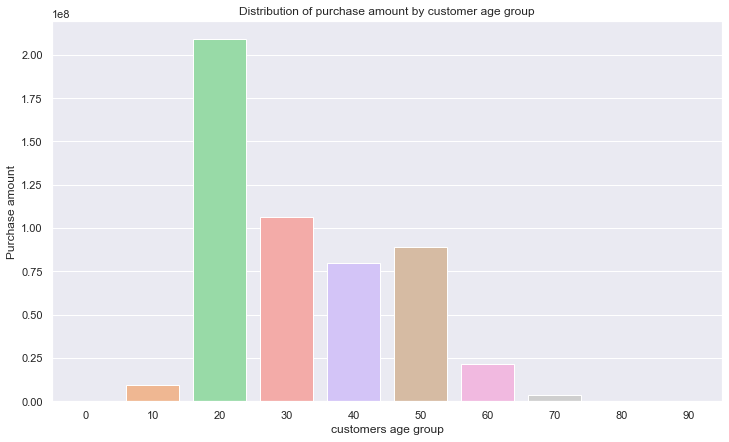

In [46]:
## 고객 연령대별 구매 금액 분포 파악

# 'age' 컬럼을 10세씩 묶어서 그룹화
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0', '10', '20', '30', '40', '50', '60', '70', '80', '90'], right=False)

# 'price' 컬럼에 590을 곱하여 실제 구매 가격으로 변환
df['actual_price'] = df['price'] * 590

# 연령대별 구매 금액 합계 계산
age_group_purchase = df.groupby('age_group')['actual_price'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=age_group_purchase, x='age_group', y='actual_price', palette='pastel')
plt.xlabel('customers age group')
plt.ylabel('Purchase amount')
plt.title('Distribution of purchase amount by customer age group')
plt.show()

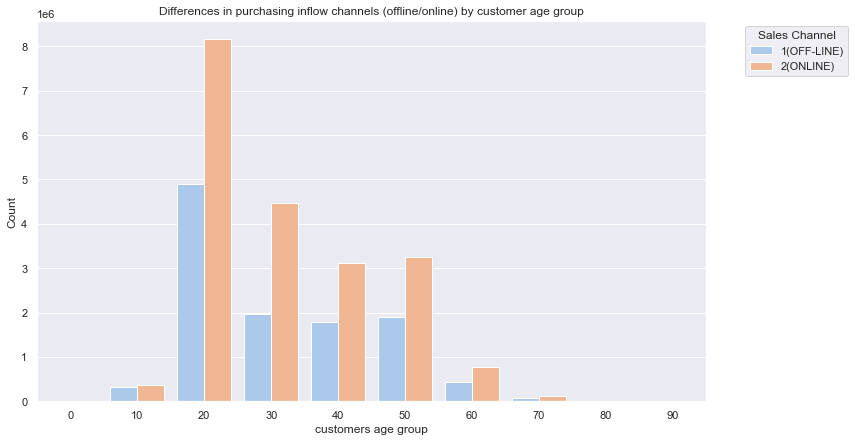

In [47]:
## 고객 연령대별 구매 유입 채널(오프라인/온라인) 차이 파악

# 중복되는 customer_id 제거하여 각 고객의 최근 구매 방식 파악
latest_purchase = df.groupby('customer_id')['sales_channel_id'].last().reset_index()

# 연령대별로 구매 방식에 대한 차이 파악
age_group_purchase_channel = pd.merge(latest_purchase, df[['customer_id', 'age_group']], on='customer_id', how='inner')
age_group_purchase_channel = age_group_purchase_channel.groupby(['age_group', 'sales_channel_id']).size().reset_index(name='count')

# 범례 라벨 이름 변경
legend_labels = {
    1: '1(OFF-LINE)',
    2: '2(ONLINE)'
}
age_group_purchase_channel['sales_channel_id'] = age_group_purchase_channel['sales_channel_id'].map(legend_labels)

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=age_group_purchase_channel, x='age_group', y='count', hue='sales_channel_id', palette='pastel')
plt.xlabel('customers age group')
plt.ylabel('Count')
plt.title('Differences in purchasing inflow channels (offline/online) by customer age group')
plt.legend(title='Sales Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()